In [1]:
"""
Final Project.

This program builds a classifier for the Large-Scale Fish dataset using Scikit-Learn.

Authors: Calvin Spencer and Rida Shahid
"""

'\nFinal Project.\n\nThis program builds a classifier for the Large-Scale Fish dataset using Scikit-Learn.\n\nAuthors: Calvin Spencer and Rida Shahid\n'

In [5]:
import zipfile
with zipfile.ZipFile("NA_Fish_Dataset.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [10]:
import glob
glob.glob('data/NA_Fish_Dataset/**')

['data/NA_Fish_Dataset/Sea Bass',
 'data/NA_Fish_Dataset/Red Mullet',
 'data/NA_Fish_Dataset/Gilt Head Bream',
 'data/NA_Fish_Dataset/Red Sea Bream',
 'data/NA_Fish_Dataset/Shrimp',
 'data/NA_Fish_Dataset/Black Sea Sprat',
 'data/NA_Fish_Dataset/Horse Mackerel',
 'data/NA_Fish_Dataset/Striped Red Mullet',
 'data/NA_Fish_Dataset/Trout']

In [11]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 51.0 MB 136 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


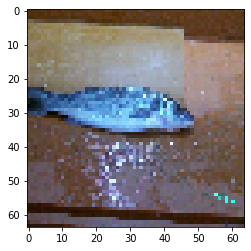

In [6]:
import cv2 as cv
img = cv.imread("data/NA_Fish_Dataset/Sea Bass/10.JPG")
img = cv.resize(img, (64,64))
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(img)

In [46]:
from pathlib import Path
import os
file = Path("data/NA_Fish_Dataset")
File_Path_png = list(file.glob("**/*.png"))
Labels_png = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],File_Path))

File_Path_jpg = list(file.glob("**/*.JPG"))
Labels_jpg = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],File_Path_jpg))

In [47]:
print(set(Labels_png))
print(set(Labels_jpg))
print(len(set(File_Path_png)))
print(len(set(File_Path_jpg)))

{'Gilt Head Bream', 'Black Sea Sprat', 'Trout', 'Horse Mackerel', 'Shrimp', 'Red Mullet', 'Striped Red Mullet'}
{'Red Sea Bream', 'Sea Bass', 'Gilt Head Bream'}
281
148


In [48]:
import pandas as pd

File_Path_png = pd.Series(File_Path_png).astype(str)
Labels_png = pd.Series(Labels_png)
data_png = pd.concat([File_Path_png,Labels_png],axis=1)

File_Path_jpg = pd.Series(File_Path_jpg).astype(str)
Labels_jpg = pd.Series(Labels_jpg)
data_jpg = pd.concat([File_Path_jpg,Labels_jpg],axis=1)

data.columns = ['image', 'label']

In [24]:
print(File_Path_png[0])
print(File_Path_jpg[0])

data/NA_Fish_Dataset/Red Mullet/00046.png
data/NA_Fish_Dataset/Sea Bass/48.JPG


In [49]:
from PIL import Image
for i in File_Path_jpg:
    print(i)
    im1 = Image.open(i)
    im1.save(i[:-3]+'png')

data/NA_Fish_Dataset/Sea Bass/48.JPG
data/NA_Fish_Dataset/Sea Bass/49.JPG
data/NA_Fish_Dataset/Sea Bass/8.JPG
data/NA_Fish_Dataset/Sea Bass/9.JPG
data/NA_Fish_Dataset/Sea Bass/14.JPG
data/NA_Fish_Dataset/Sea Bass/28.JPG
data/NA_Fish_Dataset/Sea Bass/29.JPG
data/NA_Fish_Dataset/Sea Bass/15.JPG
data/NA_Fish_Dataset/Sea Bass/17.JPG
data/NA_Fish_Dataset/Sea Bass/16.JPG
data/NA_Fish_Dataset/Sea Bass/12.JPG
data/NA_Fish_Dataset/Sea Bass/13.JPG
data/NA_Fish_Dataset/Sea Bass/39.JPG
data/NA_Fish_Dataset/Sea Bass/11.JPG
data/NA_Fish_Dataset/Sea Bass/10.JPG
data/NA_Fish_Dataset/Sea Bass/38.JPG
data/NA_Fish_Dataset/Sea Bass/21.JPG
data/NA_Fish_Dataset/Sea Bass/35.JPG
data/NA_Fish_Dataset/Sea Bass/34.JPG
data/NA_Fish_Dataset/Sea Bass/20.JPG
data/NA_Fish_Dataset/Sea Bass/36.JPG
data/NA_Fish_Dataset/Sea Bass/22.JPG
data/NA_Fish_Dataset/Sea Bass/23.JPG
data/NA_Fish_Dataset/Sea Bass/37.JPG
data/NA_Fish_Dataset/Sea Bass/33.JPG
data/NA_Fish_Dataset/Sea Bass/27.JPG
data/NA_Fish_Dataset/Sea Bass/26.JPG
dat

In [50]:
File_Path = list(file.glob(r"**/*.png"))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],File_Path))
print(set(Labels))
import pandas as pd
File_Path = pd.Series(File_Path).astype(str)
Labels = pd.Series(Labels)
data = pd.concat([File_Path,Labels],axis=1)
data.columns = ['image', 'label']

{'Sea Bass', 'Gilt Head Bream', 'Black Sea Sprat', 'Trout', 'Horse Mackerel', 'Red Sea Bream', 'Shrimp', 'Red Mullet', 'Striped Red Mullet'}


In [53]:
File_Path

0      data/NA_Fish_Dataset/Sea Bass/48.png
1      data/NA_Fish_Dataset/Sea Bass/49.png
2       data/NA_Fish_Dataset/Sea Bass/8.png
3       data/NA_Fish_Dataset/Sea Bass/9.png
4      data/NA_Fish_Dataset/Sea Bass/14.png
                       ...                 
424    data/NA_Fish_Dataset/Trout/00029.png
425    data/NA_Fish_Dataset/Trout/00015.png
426    data/NA_Fish_Dataset/Trout/00001.png
427    data/NA_Fish_Dataset/Trout/00014.png
428    data/NA_Fish_Dataset/Trout/00028.png
Length: 429, dtype: object

In [54]:
data.head()

,image,label
0,data/NA_Fish_Dataset/Sea Bass/48.png,Sea Bass
1,data/NA_Fish_Dataset/Sea Bass/49.png,Sea Bass
2,data/NA_Fish_Dataset/Sea Bass/8.png,Sea Bass
3,data/NA_Fish_Dataset/Sea Bass/9.png,Sea Bass
4,data/NA_Fish_Dataset/Sea Bass/14.png,Sea Bass


In [55]:
data.tail()

,image,label
424,data/NA_Fish_Dataset/Trout/00029.png,Trout
425,data/NA_Fish_Dataset/Trout/00015.png,Trout
426,data/NA_Fish_Dataset/Trout/00001.png,Trout
427,data/NA_Fish_Dataset/Trout/00014.png,Trout
428,data/NA_Fish_Dataset/Trout/00028.png,Trout


In [56]:
classes = data['label'].unique()
print(f'\nClasses:\n {classes} ')


Classes:
 ['Sea Bass' 'Red Mullet' 'Gilt Head Bream' 'Red Sea Bream' 'Shrimp'
 'Black Sea Sprat' 'Horse Mackerel' 'Striped Red Mullet' 'Trout'] 


In [57]:
print(len(data))
for i in range(len(data)):
    if data['label'][i] == '.ipynb_checkpoints':
        print(data.iloc[i])

429


In [58]:
print(data.loc[50:'image'])
data = data.drop(data.index[50])

                                         image       label
50   data/NA_Fish_Dataset/Red Mullet/00046.png  Red Mullet
51   data/NA_Fish_Dataset/Red Mullet/00047.png  Red Mullet
52   data/NA_Fish_Dataset/Red Mullet/00045.png  Red Mullet
53   data/NA_Fish_Dataset/Red Mullet/00050.png  Red Mullet
54   data/NA_Fish_Dataset/Red Mullet/00044.png  Red Mullet
..                                         ...         ...
424       data/NA_Fish_Dataset/Trout/00029.png       Trout
425       data/NA_Fish_Dataset/Trout/00015.png       Trout
426       data/NA_Fish_Dataset/Trout/00001.png       Trout
427       data/NA_Fish_Dataset/Trout/00014.png       Trout
428       data/NA_Fish_Dataset/Trout/00028.png       Trout

[379 rows x 2 columns]


In [59]:
print(data.loc[299:'image'])
data = data.drop(data.index[299])

                                             image           label
299  data/NA_Fish_Dataset/Horse Mackerel/00046.png  Horse Mackerel
300  data/NA_Fish_Dataset/Horse Mackerel/00047.png  Horse Mackerel
301  data/NA_Fish_Dataset/Horse Mackerel/00045.png  Horse Mackerel
302  data/NA_Fish_Dataset/Horse Mackerel/00050.png  Horse Mackerel
303  data/NA_Fish_Dataset/Horse Mackerel/00044.png  Horse Mackerel
..                                             ...             ...
424           data/NA_Fish_Dataset/Trout/00029.png           Trout
425           data/NA_Fish_Dataset/Trout/00015.png           Trout
426           data/NA_Fish_Dataset/Trout/00001.png           Trout
427           data/NA_Fish_Dataset/Trout/00014.png           Trout
428           data/NA_Fish_Dataset/Trout/00028.png           Trout

[130 rows x 2 columns]


In [60]:
print(len(data))

427


In [61]:
Y = data['label']
print(np.array(np.unique(Y, return_counts=True)).T)

[['Black Sea Sprat' 50]
 ['Gilt Head Bream' 50]
 ['Horse Mackerel' 49]
 ['Red Mullet' 49]
 ['Red Sea Bream' 49]
 ['Sea Bass' 50]
 ['Shrimp' 50]
 ['Striped Red Mullet' 50]
 ['Trout' 30]]


In [62]:
from sklearn.utils import shuffle
data = shuffle(data)

In [63]:
data.head()

,image,label
287,data/NA_Fish_Dataset/Black Sea Sprat/00006.png,Black Sea Sprat
57,data/NA_Fish_Dataset/Red Mullet/00043.png,Red Mullet
152,data/NA_Fish_Dataset/Red Sea Bream/100_1481.png,Red Sea Bream
308,data/NA_Fish_Dataset/Horse Mackerel/00031.png,Horse Mackerel
425,data/NA_Fish_Dataset/Trout/00015.png,Trout


In [64]:
data.tail()

,image,label
322,data/NA_Fish_Dataset/Horse Mackerel/00008.png,Horse Mackerel
334,data/NA_Fish_Dataset/Horse Mackerel/00007.png,Horse Mackerel
345,data/NA_Fish_Dataset/Horse Mackerel/00014.png,Horse Mackerel
371,data/NA_Fish_Dataset/Striped Red Mullet/00022.png,Striped Red Mullet
93,data/NA_Fish_Dataset/Red Mullet/00029.png,Red Mullet


In [65]:
data.to_csv('data_csv.csv')